In [32]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pylab as plt

In [38]:
__auther__ = "Kousuke Tsuchiya"
__studentId__ = "s1F101700158"

In [10]:
data = pd.read_csv("data/ToothGrowth_v2.csv", comment="!")

In [14]:
data

,sn,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


## 2-2-1

In [17]:
data_oj = data[data["supp"]=="OJ"][["len", "dose"]]

In [27]:
formula_ = "len~dose"

In [29]:
model = smf.ols(formula=formula_, data=data_oj)

In [30]:
results = model.fit()

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     36.01
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.82e-06
Time:                        16:52:51   Log-Likelihood:                -86.294
No. Observations:                  30   AIC:                             176.6
Df Residuals:                      28   BIC:                             179.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5500      1.722      6.708      0.0

In [62]:
print(results.params)
txt = "回帰式: Y(len) = {0:.3f} + {1:.3f} * X(dose)".format(results.params["Intercept"], results.params["dose"])
print(txt)

Intercept    11.550000
dose          7.811429
dtype: float64
回帰式: Y(len) = 11.550 + 7.811 * X(dose)


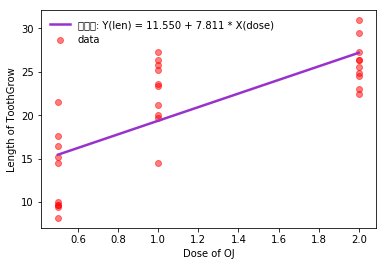

In [63]:
ax = plt.subplot(111)
ax.scatter(data_oj["dose"], data_oj["len"], alpha=0.5, color="red", label="data")
x_pred = np.linspace(data_oj["dose"].min(), data_oj["dose"].max(), 50)
y_pred = results.predict(exog=dict(dose=x_pred))
ax.plot(x_pred, y_pred, "-", color="darkorchid", linewidth=2.5, label=txt)
plt.xlabel("Dose of OJ")
plt.ylabel("Length of ToothGrow")
ax.legend([txt, "data"], frameon=False)
plt.show()

## 2-2-2

In [64]:
data_oj_len = data[data["supp"]=="OJ"]["len"]
data_vc_len = data[data["supp"]=="VC"]["len"]

In [69]:
print("Len(VC): {0:.3f}\nLen(OJ): {1:.3f}".format(data_vc_len.mean(), data_oj_len.mean()))

Len(VC): 16.963
Len(OJ): 20.663


## 2-2-3

In [79]:
source_ = np.array([3,5,7,9,11,13,17])

In [80]:
win_size = 3
def rolling_mean(source, win_size):
    rolling_result = []
    for i in range(0,len(source)):
        rolling_result.append(source[i:i+(win_size-1)].mean())
    return rolling_result
print(rolling_mean(source_, win_size))

[4.0, 6.0, 8.0, 10.0, 12.0, 15.0, 17.0]
